In [1]:
from qiskit_aer import AerSimulator
from qiskit import *
import supermarq
import numpy as np 
import os
import qiskit

In [4]:
benchmark_features = {}
benchmarks = [
    (supermarq.bit_code.BitCode(3, 3, [1, 0, 1]), "bitcode3"),
    (supermarq.ghz.GHZ(3), "ghz3"),
    (supermarq.hamiltonian_simulation.HamiltonianSimulation(3), "hsim3"),
    (supermarq.mermin_bell.MerminBell(3), "marmin_bell_3"),
    (supermarq.qaoa_fermionic_swap_proxy.QAOAFermionicSwapProxy(3), "qaoa_swap_proxy3"),
    (supermarq.qaoa_vanilla_proxy.QAOAVanillaProxy(3), "qaoa_vanilla_proxy3"), 
]

In [5]:
for benchmark, label in benchmarks:
    benchmark_features[label] = [
        supermarq.converters.compute_communication_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_depth_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_entanglement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_liveness_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_measurement_with_qiskit(benchmark.qiskit_circuit()),
        supermarq.converters.compute_parallelism_with_qiskit(benchmark.qiskit_circuit()),]
print(benchmark_features)

{'bitcode3': [0.4, 0.5, 0.8571428571428571, 0.6142857142857143, 0.46153846153846156, 0.0], 'ghz3': [0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0], 'hsim3': [0.6666666666666666, 1.0, 0.26666666666666666, 0.7333333333333333, 0.0, 0.25], 'marmin_bell_3': [1.0, 1.0, 0.4375, 0.6666666666666666, 0.0, 0.11538461538461542], 'qaoa_swap_proxy3': [0.6666666666666666, 1.0, 0.5, 0.6666666666666666, 0.0, 0.09999999999999998], 'qaoa_vanilla_proxy3': [1.0, 1.0, 0.4, 0.6666666666666666, 0.0, 0.125]}


In [27]:
for benchmark, label in benchmarks:
    print(benchmark_features[label])

[0.4, 0.5, 0.8571428571428571, 0.6142857142857143, 0.46153846153846156, 0.0]
[0.6666666666666666, 1.0, 0.6666666666666666, 0.6666666666666666, 0.0, 0]
[0.6666666666666666, 1.0, 0.26666666666666666, 0.7333333333333333, 0.0, 0.25]
[1.0, 1.0, 0.4375, 0.6666666666666666, 0.0, 0.11538461538461542]
[0.6666666666666666, 1.0, 0.5, 0.6666666666666666, 0.0, 0.09999999999999998]
[1.0, 1.0, 0.4, 0.6666666666666666, 0.0, 0.125]


In [8]:
emulator = Aer.get_backend('aer_simulator_density_matrix')

In [14]:
benchmark_job = {}
for benchmark, label in benchmarks:
    benchmark_job[label] = [execute(transpile(benchmark.qiskit_circuit(), emulator), emulator, shots=10, memory=False).result()]

In [15]:
print(benchmark_job)

{'bitcode3': [Result(backend_name='aer_simulator', backend_version='0.13.0', qobj_id='', job_id='0439704d-1641-47f4-95ad-14847de15a85', success=True, results=[ExperimentResult(shots=10, success=True, meas_level=2, data=ExperimentResultData(counts={'0x47f': 10}), header=QobjExperimentHeader(creg_sizes=[['m_mcm0', 2], ['m_mcm1', 2], ['m_mcm2', 2], ['m_meas_all', 5]], global_phase=0.0, memory_slots=11, n_qubits=5, name='circuit-333', qreg_sizes=[['q', 5]], metadata={}), status=DONE, seed_simulator=2888343873, metadata={'time_taken': 0.000308412, 'num_bind_params': 1, 'parallel_state_update': 2, 'required_memory_mb': 1, 'input_qubit_map': [[4, 4], [3, 3], [2, 2], [1, 1], [0, 0]], 'method': 'density_matrix', 'device': 'CPU', 'num_qubits': 5, 'active_input_qubits': [0, 1, 2, 3, 4], 'num_clbits': 11, 'remapped_qubits': False, 'parallel_shots': 10, 'runtime_parameter_bind': False, 'max_memory_mb': 63964, 'noise': 'ideal', 'measure_sampling': False, 'batched_shots_optimization': False, 'fusion'

In [20]:
for benchmark, label in benchmarks:
    print(benchmark)    

In [21]:
for benchmark, label in benchmarks:
    print(label)    

bitcode3
ghz3
hsim3
marmin_bell_3
qaoa_swap_proxy3
qaoa_vanilla_proxy3


ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

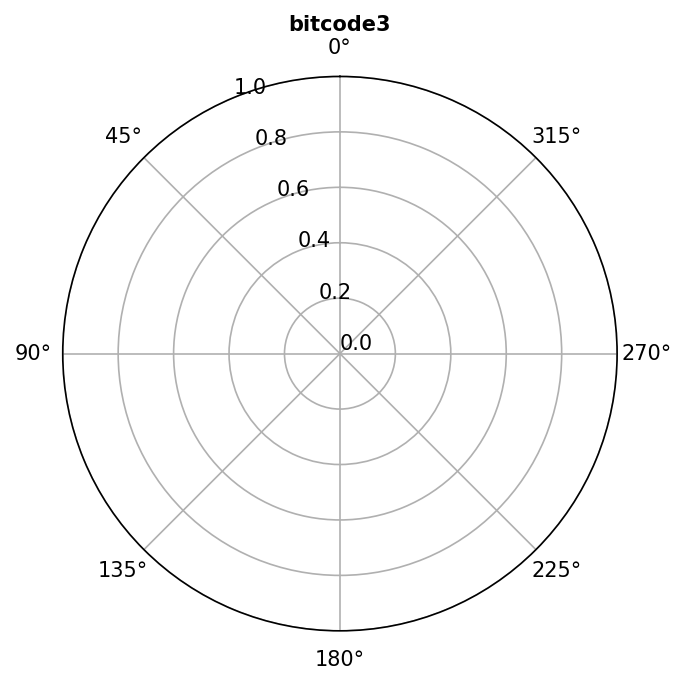

In [22]:
for benchmark, label in benchmarks:
    supermarq.plotting.plot_benchmark([label, [label], [benchmark_features[label]]],spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],)

In [ ]:
print(benchmark_features)

In [ ]:
h_sim_features = [
    supermarq.converters.compute_communication_with_qiskit(h_sim_circuit),
    supermarq.converters.compute_depth_with_qiskit(h_sim_circuit),
    supermarq.converters.compute_entanglement_with_qiskit(h_sim_circuit),
    supermarq.converters.compute_liveness_with_qiskit(h_sim_circuit),
    supermarq.converters.compute_measurement_with_qiskit(h_sim_circuit),
    supermarq.converters.compute_parallelism_with_qiskit(h_sim_circuit),
]
print(h_sim_features)
print("--------------------------------------------------------------")
supermarq.plotting.plot_benchmark(
    ["A single Hamiltonian Simulation benchmark", ["h_sim"], [h_sim_features]],
    spoke_labels=["PC", "CD", "Ent", "Liv", "Mea", "Par"],
)

In [ ]:
counts = job.result().get_counts()
print(counts)

In [ ]:
score = h_sim.score(counts)
print(score)

In [ ]:
supermarq.plotting.plot_results([score], ["h_sim_4"])

In [ ]:
jobs = []
for benchmark, label in benchmarks:
    job = emulator.run(benchmark.qiskit_circuit(), shots=1000)
    jobs.append((label, job, benchmark))
jobs

In [ ]:
job.status()

In [ ]:
device_scores = {}
for label, job, benchmark in jobs:
    if job.status() == qiskit.providers.jobstatus.JobStatus.DONE:
        counts = job.result(0).get_counts()
        print(counts)
        score = benchmark.score(counts)
        print(score)
        device_scores[label] = score
    else:
        print(label, "not done!")

In [ ]:
supermarq.plotting.plot_correlations(benchmark_features,
    device_scores,
    ["PC", "CD", "Ent", "Liv", "Mea", "Par"],
    device_name="Aer_DM_Sim",)